# Bank transactions analysis (EDA + Pandas)

# Навыки

Pandas, визуализация, анализ пользовательского поведения

# О датасете

 Источник: Credit Card Transactions Dataset https://www.kaggle.com/datasets/kartik2112/fraud-detection  
 Формат: CSV-файл с колонками:  
 •	index - Unique Identifier for each row  
•	trans_date_trans_time - Transaction DateTime  
•	cc_num - Credit Card Number of Customer  
•	merchant - Merchant Name  
•	category - Category of Merchant  
•	amt - Amount of Transaction  
•	first - First Name of Credit Card Holder  
•	last - Last Name of Credit Card Holder  
•	gender - Gender of Credit Card Holder  
•	street - Street Address of Credit Card Holder  
•	city - City of Credit Card Holder  
•	state - State of Credit Card Holder  
•	zip - Zip of Credit Card Holder  
•	lat - Latitude Location of Credit Card Holder  
•	long - Longitude Location of Credit Card Holder  
•	city_pop - Credit Card Holder's City Population  
•	job - Job of Credit Card Holder  
•	dob - Date of Birth of Credit Card Holder  
•	trans_num - Transaction Number  
•	unix_time - UNIX Time of transaction  
•	merch_lat - Latitude Location of Merchant  
•	merch_long - Longitude Location of Merchant  
•	is_fraud - Fraud Flag <--- Target Class  

# О проекте

**Проект**: Анализ транзакций клиентов банка (EDA + Pandas)  

**Данные**:
Датасет содержит реальные банковские транзакции с меткой мошенничества (is_fraud).  

**Цель проекта**:

 • Изучить поведение клиентов банка по транзакциям  
 • Выявить основные категории расходов  
 • Найти аномальные транзакции  
 • Определить закономерности мошеннических операций  

1️⃣ **Предобработка и анализ данных (EDA)**

Какие вопросы будут изучены?  
✔️ Сколько обычно тратят клиенты?  
✔️ В какое время чаще совершаются покупки?  
✔️ Кто совершает самые крупные транзакции?  
✔️ Какие категории транзакций самые популярные?  
✔️ Сколько в среднем тратят по категориям?  

 1. Загрузка данных в Pandas (data = pd.read_csv(...))  
 2. Обработка пропущенных значений (data.isnull().sum())  
 3. Проверка и корректировка типов данных (datetime, float, int)  
 4. Распределение сумм покупок  
 • data['amt'].describe()  
 • sns.histplot(data['amt'], bins=50)  
 • Топ-10 самых крупных транзакций  
 • Топ-10 клиентов с наибольшими тратами
 5. Популярные категории покупок  
 • data['category'].value_counts()  
 • sns.countplot(y=data['category'], order=data['category'].value_counts().index)   
 • Средняя сумма покупок по категориям  
 6. Анализ по времени  
 • Преобразуем trans_date_trans_time в datetime  
 • Определим распределение транзакций по часам (data['hour'] = data['trans_date_trans_time'].dt.hour)  
 • sns.histplot(data['hour'], bins=24)  


2️⃣ **Анализ мошенничества (is_fraud)**  

Какие вопросы будут изучены:  
✔️ Каков объём фрода?  
✔️ В каких категориях фрода больше?  
✔️ Сколько тратят мошенники?  
✔️ Когда мошенники активнее?  


 1. Распределение мошеннических и обычных транзакций  
 • data['is_fraud'].value_counts(normalize=True)  
 • sns.countplot(x='is_fraud', data=data)  
 
 
 2. Какие категории чаще всего используются в мошенничестве?  
data[data['is_fraud'] == 1]['category'].value_counts()  


 3. Средний чек мошеннических транзакций  
data.groupby('is_fraud')['amt'].describe()  


 4. Связь времени суток и мошенничества  
sns.histplot(data[data['is_fraud'] == 1]['hour'], bins=24, color='black')  
sns.histplot(data[data['is_fraud'] == 0]['hour'], bins=24, color='green')  


# 1️⃣ Предобработка и анализ данных (EDA)

Какие вопросы будут изучены:  
✔️ Сколько обычно тратят клиенты?  
✔️ В какое время чаще совершаются покупки?  
✔️ Кто совершает самые крупные транзакции?  
✔️ Какие категории транзакций самые популярные?  
✔️ Сколько в среднем тратят по категориям?  

## 1. Загрузка данных в Pandas, display

In [1]:
import pandas as pd
data = pd.read_csv('credit_card_fraud_dataset/fraudTrain.csv')
data = pd.DataFrame(data) # загрузка данных в  DataFrame
display(data.head()) #вывод таблицы

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


##  2. Проверка пропущенных значений (df.isnull().sum())  

In [2]:
print(data.isna().sum()) #Вывод: В таблице нет пропущенных значений

#Если бы в колонках были пропущенные значения, то при необходимости:
## Их можно заполнить нулем
data['amt'] = data['amt'].fillna(0) 

## Заполнить медианным значением для числовых данных с выбросами или асимметричным распределением без сложных зависимостей
mediana = data['amt'].median()
print(mediana)
data['amt'] = data['amt'].fillna(mediana)

## Или удалить
data = data.dropna(subset=['amt', 'trans_num']) #метод .dropna() для удаления пропусков, параметр subset для указания столбцов, где искать пропуски


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
47.52


In [3]:
# Проверка на наличие дублекатов
print(data.duplicated().sum())

# Дублекатов нет

0


## 3. Проверка типов данных и преобразование (datetime, float, int)  

In [4]:
print(data.info()) #вывод информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce') #перевод Transaction datetime типа object в datetime
data['dob'] = pd.to_datetime(data['dob'], errors='coerce') #перевод Date of birth типа object в datetime
data['dob'] = data['dob'].dt.date #округдляем Date of birth до даты
# остальные данные подходящего типа

**Итог**:  
1. Загрузила данные в Pandas
2. Проанализировала пропущенные значения, датасет не содержит пропусков.  
3. Проверила и скорректировала типы данных

## 4. Распределение сумм транзакций

In [6]:
print(data['amt'].describe()) 

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64


**Выводы**:
- Данные имеют большой разброс: от 1 до 28 948.90
- Стандартное отклонение (std) составляет 160.32, что указывает на значительный разброс данных вокруг среднего. Это говорит о том, что значения в столбце сильно варьируются.
- Медиана (47.52) значительно меньше среднего (70.35), что указывает на правостороннюю асимметрию (скошенность) распределения. Это означает, что в данных есть выбросы или экстремально большие значения, которые "тянут" среднее вверх.
- Данные имеют большой разброс и асимметрию.

Для более детального анализа можно рассмотреть распределение данных, а также проверить наличие выбросов.

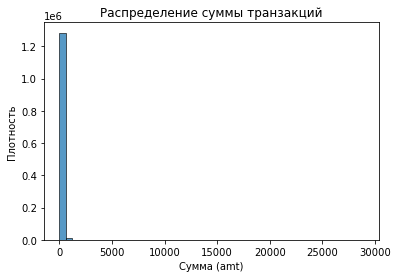

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение гистограммы
sns.histplot(data['amt'], bins=50)
plt.title('Распределение суммы транзакций')
plt.xlabel('Сумма (amt)')
plt.ylabel('Плотность')
plt.show()

Разброс данных высок. Линейный масштаб делает визуализацию нечитаемой. Для более детального анализа данных применить логарифмирование.

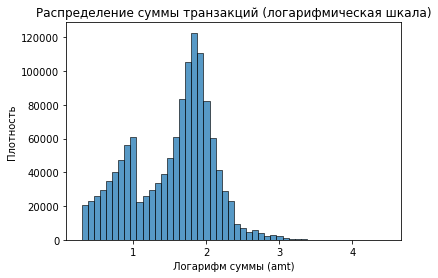

In [8]:
# Построение гистограммы для логарифмированных данных
# Логарифмическое преобразование
import numpy as np
data['amt_log'] = np.log10(data['amt'] + 1)  # +1 чтобы избежать log(0)
sns.histplot(data['amt_log'], bins=50)
plt.title('Распределение суммы транзакций (логарифмическая шкала)')
plt.xlabel('Логарифм суммы (amt)')
plt.ylabel('Плотность')
plt.show()

Вывод: распределение не нормальное, на гистограмме два пика: log(amt) = 1 и log(amt) = 2. Большинство значений amt находятся около log(amt) = 2.
Есть выбросы, находящиеся на промежутке от log(amt) = 3 до log(amt) = 4.  
- если log(amt) = 1, то amt = 10
- если log(amt) = 2, то amt = 100  
- если log(amt) = 3, то amt = 1000  
- если log(amt) = 4, то amt = 10000  

In [9]:
#вывод топ10 транзакций с самым большим чеком в виде "индекс - значение"
top_10 = data['amt'].nlargest(10)
print(top_10)

787549     28948.90
793677     27390.12
1234797    27119.77
606211     26544.12
352894     25086.94
187885     17897.24
1100138    15305.95
752016     15047.03
150564     15034.18
1245847    14849.74
Name: amt, dtype: float64


In [10]:
# Топ-10 клиентов с наибольшими тратами 
big_clients = data.groupby('cc_num')['amt'].sum().sort_values(ascending=False).head(10)

# Проходим по каждому клиенту из топ-10
for cc_num in big_clients.index:
    # Находим все строки, где cc_num совпадает с текущим клиентом
    client_data = data[data['cc_num'] == cc_num]
    
    # Берем имя и фамилию из первой строки (предполагаем, что они одинаковы для одного cc_num)
    first_name = client_data['first'].iloc[0] # .iloc[0] для получения одного первого значения из этих столбцов
    last_name = client_data['last'].iloc[0]
    
    # Выводим результат
    print(f'Клиент: {first_name} {last_name}, Сумма покупок: {big_clients[cc_num]}')

Клиент: Tammy Ayers, Сумма покупок: 296436.73
Клиент: Lauren Torres, Сумма покупок: 290478.49
Клиент: Allison Allen, Сумма покупок: 284013.5
Клиент: Jessica Perez, Сумма покупок: 280008.05
Клиент: Erin Chavez, Сумма покупок: 278325.97
Клиент: Rebecca Erickson, Сумма покупок: 278139.27
Клиент: Crystal Gamble, Сумма покупок: 278042.99
Клиент: Jenna Brooks, Сумма покупок: 277085.65
Клиент: Susan Hardy, Сумма покупок: 275930.63
Клиент: Kristen Hanson, Сумма покупок: 275889.68


## 5. Популярные категории транзакций

In [11]:
print(data['category'].value_counts())

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64


Text(0, 0.5, 'Категория')

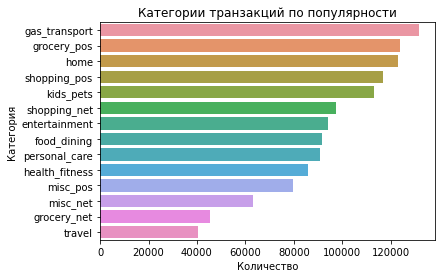

In [12]:
sns.countplot(y=data['category'], order=data['category'].value_counts().index)
plt.title('Категории транзакций по популярности')
plt.xlabel('Количество')
plt.ylabel('Категория')

Самая популярная категория по кол-ву транзакций — **gas_transport**. Меньше всего транзакций по категории **travel**.

In [13]:
# Средняя сумма покупок по категориям
data.groupby('category')['amt'].mean().sort_values(ascending=False)

category
grocery_pos       116.960986
travel            111.504720
shopping_net       88.424076
misc_net           80.865095
shopping_pos       79.779155
entertainment      64.210421
gas_transport      63.434572
misc_pos           62.890999
home               58.270139
kids_pets          57.536871
health_fitness     54.182140
grocery_net        53.670084
food_dining        51.086905
personal_care      47.967678
Name: amt, dtype: float64

Хоть и категория travel самая непопулярная, она в топ2 по среднему чеку (111.51). Категория grocery_pos отличается самым большим средним чеком (116.96) и находится в топ2 по количеству транзакций. В этих категориях клиентами может быть востребован кешбэк.

## 6. Анализ по времени

In [14]:
# Вычисление временных границ датасета
print(data['trans_date_trans_time'].min()) 
print(data['trans_date_trans_time'].max())

2019-01-01 00:00:18
2020-06-21 12:13:37


В датасете представлены транзакции за период с 01.01.2019 по 21.06.2020.

<AxesSubplot:xlabel='hour', ylabel='Count'>

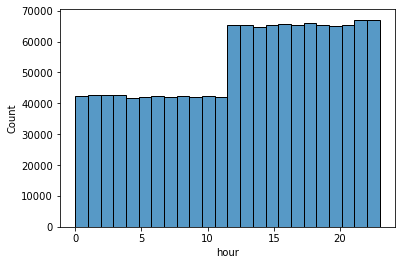

In [15]:
# Визуализаия распределения транзакций по часам
data['hour'] = data['trans_date_trans_time'].dt.hour
sns.histplot(data['hour'], bins=24) #строим гистограмму с 24 столбцами (=24 часа в сутках) 

Распределение данных стремится равномерности на промежутках (с 0 до 11 часов) и (с 12 до 24 часов). Количество транзакций больше во второй половине дня. Больше всего транзакций совершается с 22 до 24 часов.

# 2️⃣ Анализ мошенничества (is_fraud)

 1. Распределение мошеннических и обычных транзакций  
 • data['is_fraud'].value_counts(normalize=True)  
 • sns.countplot(x='is_fraud', data=data)  
 
 
 2. Какие категории чаще всего используются в мошенничестве?  
data[data['is_fraud'] == 1]['category'].value_counts()  


 3. Средний чек мошеннических транзакций  
data.groupby('is_fraud')['amt'].describe()  

 4. Связь времени суток и мошенничества  
sns.histplot(data[data['is_fraud'] == 1]['hour'], bins=24, kde=True, color='red')  
sns.histplot(data[data['is_fraud'] == 0]['hour'], bins=24, kde=True, color='blue')  

 ## 1. Распределение мошеннических и обычных транзакций  

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

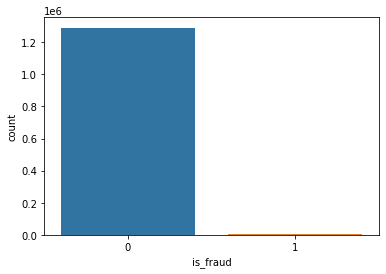

In [16]:
data['is_fraud'].value_counts(normalize=True) #normalize=True для выдачи долей
sns.countplot(x='is_fraud', data=data)

Фрод составляет 0,5% всех записей, доля низкая.

 ## 2. Какие категории чаще всего используются в мошенничестве?  

In [17]:
# Вычисляем количество фрода по категориям
data[data['is_fraud'] == 1]['category'].value_counts()

grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: category, dtype: int64

In [18]:
# Дублируем общее количество транзакций по категориям
print(data['category'].value_counts())

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64


Больше всего фрода в категории grocery_pos, что составляет менее 1,5% от общего количества транзакций в категории. Задачу по контролю объема фрода с текущей долей можно считать не приоритетной.

## 3. Средний чек мошеннических транзакций  

In [19]:
# Вычисление среднего чека фродовых транзакций
round(data[data['is_fraud'] == 1]['amt'].mean(), 2)

531.32

Средний чек фродовых транзакцй состаляет 531,32 у.е. Чтобы понять, как эта величина соотнсится с нефродовыми транзкциями, используем .describe().

In [20]:
data.groupby('is_fraud')['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1289169.0,67.667110,154.007971,1.00,9.6100,47.280,82.540,28948.90
1,7506.0,531.320092,390.560070,1.06,245.6625,396.505,900.875,1376.04


**Общий вывод**:
- Мошеннические транзакции встречаются редко, но их суммы значительно выше, чем у обычных транзакций.
- Мошенники, вероятно, избегают слишком крупных транзакций, чтобы не привлекать внимание.
-Средняя сумма мошеннических транзакций (531.32) и их распределение (высокие квартили) могут быть полезны для разработки правил обнаружения мошенничества. Например, можно настроить систему мониторинга для транзакций с суммой выше 245.66 (25% квартиль мошеннических транзакций).

## 4. Связь времени суток и мошенничества  

<AxesSubplot:xlabel='hour', ylabel='Count'>

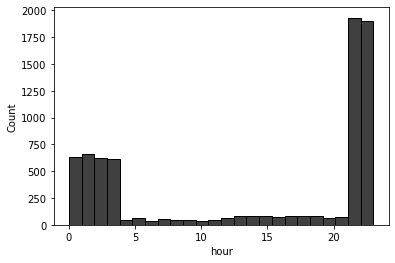

In [21]:
# Гистограмма фрода по часам
sns.histplot(data[data['is_fraud'] == 1]['hour'], bins=24, color='black')

Основные потоки фродовых транзакций приходятся на временные промежутки с 0 до 4 часов и с 22 до 24 часов.

<AxesSubplot:xlabel='hour', ylabel='Count'>

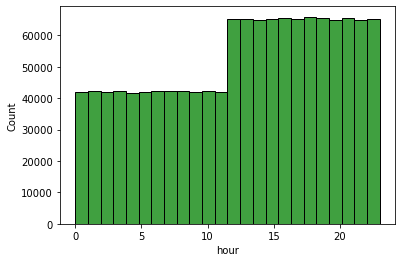

In [22]:
# Гистограмма не_фрода по часам
sns.histplot(data[data['is_fraud'] == 0]['hour'], bins=24, color='green')

Распределение обычных транзакций по часам похоже на распределение транзакций в тотале, которое строили выше. Однако тогда выделили, что с 22 до 24 часов проходит бОльшее количество транзакций. По итогам анадиза фродовых и не фродовых операций выяснили. что предвышение количества операций во второй половине дня с 22 до 24 часов происходит из-за прироста фродовых операций.

Эту информацию можно использовать для установки правил детекции фродовых транзакций, настроив фильтры по часам: с 0 до 4 часов и с 22 до 24 часов.

# Заключение по анализу датасета

На основе проведенного анализа данных можно сделать следующие выводы.

**Качество данных**:

- Датасет не содержит пропущенных значений, что упрощает анализ.
- Типы данных были проверены и скорректированы для корректности дальнейших вычислений.

**Характеристики данных**:

- Данные имеют значительный разброс: суммы транзакций варьируются от 1 до 28 948.90 у.е.
- Стандартное отклонение (160.32) и разница между медианой (47.52) и средним значением (70.35) указывают на правостороннюю асимметрию распределения. Это свидетельствует о наличии выбросов или экстремально больших значений, которые влияют на среднее.
- Логарифмирование данных позволило улучшить визуализацию и выявить два пика в распределении: большинство значений сосредоточено около log(amt) = 2, а выбросы находятся в диапазоне от log(amt) = 3 до log(amt) = 4.

**Распределение транзакций по категориям**:

- Наиболее популярная категория по количеству транзакций — gas_transport.
- Наименьшее количество транзакций приходится на категорию travel.

**Анализ мошеннических транзакций (фрод)**:

- Доля фрода в датасете составляет всего 0,5%, что указывает на низкую распространенность мошеннических операций.
- Наибольшая доля фрода наблюдается в категории grocery_pos (менее 1,5% от общего числа транзакций в этой категории). Однако текущий уровень фрода не является критичным.
- Средняя сумма мошеннических транзакций (531.32 у.е.) значительно превышает среднюю сумму обычных транзакций. Это указывает на то, что мошенники склонны совершать более крупные операции, но избегают экстремально высоких сумм, чтобы не привлекать внимание.
- Распределение фродовых транзакций по времени суток показывает два основных пика: с 0 до 4 часов и с 22 до 24 часов. Это может быть использовано для настройки правил детекции мошенничества.

**Рекомендации**:

- Для улучшения обнаружения мошеннических транзакций рекомендуется:
- Настроить мониторинг транзакций с суммами выше 245.66 у.е. (25% квартиль фродовых транзакций).
- Усилить контроль за операциями в периоды с 0 до 4 часов и с 22 до 24 часов, так как в это время наблюдается повышенная активность мошенников.
- Учитывая низкую долю фрода, текущие меры контроля можно считать достаточными, но стоит продолжать мониторинг и анализ данных для своевременного выявления изменений в поведении мошенников.

**Вывод**: проведенный анализ позволил выявить ключевые особенности датасета, включая распределение транзакций по категориям, временным промежуткам и суммам. На основе этих данных были предложены рекомендации для улучшения системы обнаружения мошеннических операций. Несмотря на низкую долю фрода, средняя сумма таких транзакций высокая, присутсвуют временные закономерности.  

✔️ Важно продолжать мониториг для своевременного выявления изменений в поведении мошенников.



Спасибо за внимание!

Ангелина Боровкова  
tg @angborovkova